## First we have to install tensorflow:

In [1]:
# pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the tensorflow and some other features
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

<h2> Impelmenting linear regration </h2>

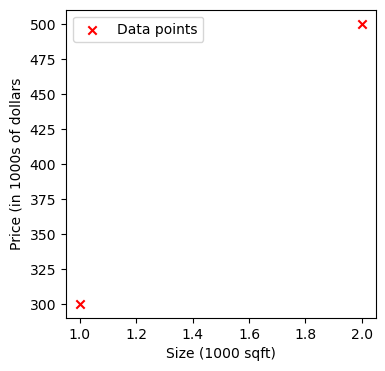

In [3]:
x_train = np.array([[1.0], [2.0]], dtype=np.float32)
y_train = np.array([[300.0], [500.0]], dtype=np.float32)

plt.figure(figsize=(4, 4))

plt.scatter(x_train, y_train, c="r", marker="x", label="Data points")
plt.ylabel("Price (in 1000s of dollars", fontsize=10)
plt.xlabel("Size (1000 sqft)", fontsize=10)
plt.legend()
plt.show()

## Regression/Linear Model

The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
                <pre><h3>f(w, b)(x) = w*x+b</h3>
</pre>
We can define a layer with one neuron or unit and compare it to the familiar linear regression function.


In [4]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear')

In [5]:
# now let see weight
linear_layer.get_weights()

[]

<b>We can see that we don't have any weight as we didn't train our model</b>

In [6]:
a1 = linear_layer(x_train[0].reshape(1, 1))
print(a1)
# x_train[0] As this is not a matrix 
# x_train[0].reshape(1, 1) # so tha we reshaped it to make it as a matrix

tf.Tensor([[0.0059936]], shape=(1, 1), dtype=float32)


<b>The result is a tensor (another name for an array) with a shape of (1,1) or one entry.
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.</b>

In [7]:
w, b = linear_layer.get_weights()
print(f'w = {w}, b = {b}')

w = [[0.0059936]], b = [0.]


<b>

A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our linear_layer above.

The weights are initialized to random values so let's set them to some known values.
</b>

In [8]:
w = np.array([[200]])
b = np.array([100])

linear_layer.set_weights([w, b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]



## Let's compare linear regration eqn to the layer output.

In [9]:
a1 = linear_layer(x_train[0].reshape(1, 1))
print(a1)
a2 = np.dot(x_train[0], w)+b
print(a2)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[300.]


They produce the same values! Now, we can use our linear layer to make predictions on our training data.

In [10]:
predict_tf = linear_layer(x_train)
predict_np = np.dot(x_train, w)+b

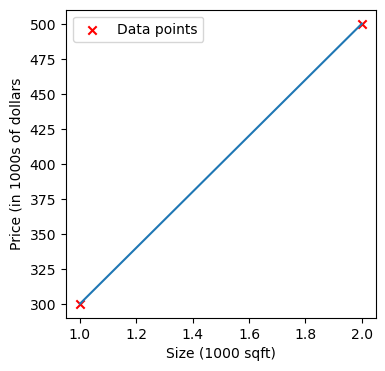

In [11]:
plt.figure(figsize=(4, 4))

plt.scatter(x_train, y_train, c="r", marker="x", label="Data points")
plt.plot(x_train, predict_np)
plt.ylabel("Price (in 1000s of dollars", fontsize=10)
plt.xlabel("Size (1000 sqft)", fontsize=10)
plt.legend()
plt.show()

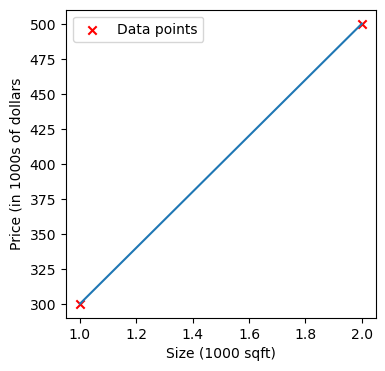

In [12]:
plt.figure(figsize=(4, 4))

plt.scatter(x_train, y_train, c="r", marker="x", label="Data points")
plt.plot(x_train, predict_tf)
plt.ylabel("Price (in 1000s of dollars", fontsize=10)
plt.xlabel("Size (1000 sqft)", fontsize=10)
plt.legend()
plt.show()

The prediction our same

# Neurons with sigmoid function 

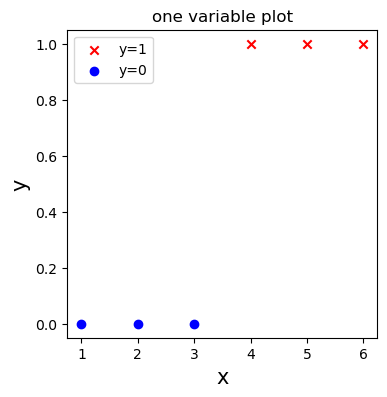

In [13]:
x_train = np.array([[1], [2], [3], [4], [5], [6]], dtype=np.float32) # we can also do it as: np.array([1, 2, 3, 4, 5, 6], dtype=np.float32).reshape(-1, 1)
y_train = np.array([[0], [0], [0], [1], [1], [1]], dtype=np.float32) 

pos = y_train == 1
neg = y_train == 0

plt.figure(figsize=(4, 4))
plt.scatter(x_train[pos], y_train[pos], marker="x", c="r", label="y=1")
plt.scatter(x_train[neg], y_train[neg], marker="o", c="b", label="y=0")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title("one variable plot")
plt.legend()
plt.show()

We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [14]:
model = Sequential([
    tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
])



model.summary() shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters,<b>w</b>
and <b>b</b>.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
logistic_layer = model.get_layer("L1")

In [17]:
w, b = logistic_layer.get_weights()
print(f"w={w}, b={b}")
print(f"w.shape={w.shape}, b.shape={b.shape}")

w=[[1.4312016]], b=[0.]
w.shape=(1, 1), b.shape=(1,)


In [18]:
# let's set weight and bias by own
w = np.array([[2]])
b = np.array([-4.5])
logistic_layer.set_weights([w, b])

logistic_layer.get_weights()

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]

In [19]:
a1 = model.predict(x_train[0].reshape(1, 1))
a2 = 1/(1+np.exp(-(np.dot(x_train[0].reshape(1, 1), w)+b)))

print(a1)
print(a2)

1/1 [==============================] - 0s 141ms/step
[[0.07585818]]
[[0.07585818]]


we get same result